In [10]:
print("Loading vix_utils into a jupyter notebook, and plotting some term structures")

Loading vix_utils into a jupyter notebook, and plotting some term structures


In [11]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc

In [12]:
#in Jupyter, use the vix_utils asynchronous functions to the load the data
#here we read the futures and cash term structure

vix_futures,vix_cash=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())


In [13]:
#another way, reading the futures, then the cash structure, in sequence instead of concurrently
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_cash_2=await vix_utils.async_get_vix_index_histories()

In [14]:
    #manipulate the data to get what we want to display
    vix_cash_wide=vix_utils.pivot_cash_term_structure_on_symbol(vix_cash)
    vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
    vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
    vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
    #we just want 9 tenors for now
    selected_tenors=list(range(1,10))
    original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
    vix_futures_wide=vix_futures_wide[selected_tenors]
    vix_futures_wide




******************************Duplicates detected for Trade Date and Tenor



1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2023-07-10 -0.0872  15.76 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  16.40   
2023-07-11 -0.2222  15.45 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  15.83   
2023-07-12 -1.2591  14.31 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  15.70   
2023-07-13 -0.1011  14.19 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  14.31   
2023-07-14 -0.3875  13.77 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  14.40   

                                                 2.0  ...        8.0    9.0  \
              Low   Open   Settle Tenor_Days  Change  ... Tenor_Days Change   
Trade Date                                            ...                     
2004-03-26    NaN    NaN      NaN        NaN  0.0000  ...      235.0    NaN   
2004-03-29    NaN    NaN      NaN        NaN  0.0000  ...      232.0    NaN   
2004-03-30    NaN    NaN      NaN        NaN -0.1800  ...      231.0    NaN   
2004-03-31    NaN    NaN      NaN        NaN  0.1300  ...      230.0    NaN   
2004-04-01    NaN    NaN      NaN        NaN -0.1300  ...      229.0    NaN   
...           ...    ...      ...        ...     ...  ...        ...    ...   
2023-07-10  15.60  15.90  15.7747        9.0 -0.1290  ...      219.0 -0.350   
2023-07-11  15.20  15.77  15.5525        8.0 -0.1229  ...      218.0 -0.225   
2023-07-12  14.25  15.41  14.2934        7.0 -0.8091  ...      217.0 -0.375   
2023-07-13  13.90  14.30  14.1923        6.0  0.1696  ...      216.0  0.075   
2023-07-14  13.75  14.19  13.8048        5.0 -0.1838  ...      215.0 -0.150   

                                                                           \
            Close     Expiry                           File   High    Low   
Trade Date                                                                  
2004-03-26    NaN        NaT                            NaN    NaN    NaN   
2004-03-29    NaN        NaT                            NaN    NaN    NaN   
2004-03-30    NaN        NaT                            NaN    NaN    NaN   
2004-03-31    NaN        NaT                            NaN    NaN    NaN   
2004-04-01    NaN        NaT                            NaN    NaN    NaN   
...           ...        ...                            ...    ...    ...   
2023-07-10  20.60 2024-03-20  2024-03-20.w_.CFE_VX_2024.csv  21.05  20.60   
2023-07-11  20.55 2024-03-20  2024-03-20.w_.CFE_VX_2024.csv  20.60  20.50   
2023-07-12  20.00 2024-03-20  2024-03-20.w_.CFE_VX_2024.csv  20.30  20.00   
2023-07-13  20.09 2024-03-20  2024-03-20.w_.CFE_VX_2024.csv  20.10  19.82   
2023-07-14  19.80 2024-03-20  2024-03-20.w_.CFE_VX_2024.csv  20.15  19.80   

                                      
             Open  Settle Tenor_Days  
Trade Date                            
2004-03-26    NaN     NaN        NaN  
2004-03-29    NaN     NaN        NaN  
2004-03-30    NaN     NaN        NaN  
2004-03-31    NaN     NaN        NaN  
2004-04-01    NaN     NaN        NaN  
...           ...     ...        ...  
2023-07-10  20.75  20.650      254.0  
2023-07-11  20.55  20.425      253.0  
2023-07-12  20.10  20.050      252.0  
2023-07-13  19.90  20.125      251.0  
2023-07-14  20.07  19.975      250.0  

[4849 rows x 81 columns]

In [13]:

vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
vix_futures_wide
close=vix_futures_wide.swaplevel(0,1,axis=1)[["Close"]]

In [28]:
close=vix_futures_wide.swaplevel(axis=1)["Close"]

In [29]:
close.columns

Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')

<Axes: xlabel='Trade Date'>

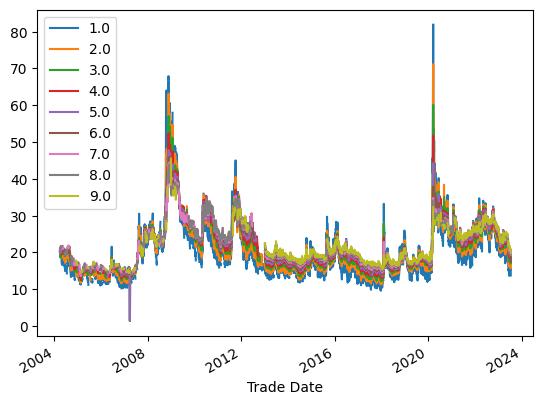

In [22]:
#plot futures
close.plot()

In [23]:
vix_cash_wide

Close                                                         \
Symbol        GVZ  LONGVOL    OVX   SHORTVOL    VIX  VIX3M  VIX6M  VIX9D   
Trade Date                                                                 
1990-01-02    NaN      NaN    NaN        NaN  17.24    NaN    NaN    NaN   
1990-01-03    NaN      NaN    NaN        NaN  18.19    NaN    NaN    NaN   
1990-01-04    NaN      NaN    NaN        NaN  19.22    NaN    NaN    NaN   
1990-01-05    NaN      NaN    NaN        NaN  20.11    NaN    NaN    NaN   
1990-01-08    NaN      NaN    NaN        NaN  20.26    NaN    NaN    NaN   
...           ...      ...    ...        ...    ...    ...    ...    ...   
2023-07-10  12.41  28.7226  38.35  1653.1131  15.07  17.25  19.21  13.50   
2023-07-11  12.64  28.4225  32.43  1670.3871  14.84  16.97  18.97  13.70   
2023-07-12  13.12  26.8397  32.69  1763.4051  13.54  16.11  18.26  11.38   
2023-07-13  12.73  26.9146  30.04  1758.4864  13.61  16.12  18.24  12.13   
2023-07-14  12.05      NaN  30.00        NaN  13.34  16.04  18.21  11.90   

                          ... Low                                            \
Symbol       VVIX  VXTLT  ... GVZ LONGVOL OVX SHORTVOL    VIX  VIX3M  VIX6M   
Trade Date                ...                                                 
1990-01-02    NaN    NaN  ... NaN     NaN NaN      NaN  17.24    NaN    NaN   
1990-01-03    NaN    NaN  ... NaN     NaN NaN      NaN  18.19    NaN    NaN   
1990-01-04    NaN    NaN  ... NaN     NaN NaN      NaN  19.22    NaN    NaN   
1990-01-05    NaN    NaN  ... NaN     NaN NaN      NaN  20.11    NaN    NaN   
1990-01-08    NaN    NaN  ... NaN     NaN NaN      NaN  20.26    NaN    NaN   
...           ...    ...  ...  ..     ...  ..      ...    ...    ...    ...   
2023-07-10  95.33  17.04  ... NaN     NaN NaN      NaN  15.04  17.20  19.14   
2023-07-11  95.21  16.55  ... NaN     NaN NaN      NaN  14.63  16.86  18.91   
2023-07-12  95.85  15.47  ... NaN     NaN NaN      NaN  13.51  16.05  18.17   
2023-07-13  96.43  15.12  ... NaN     NaN NaN      NaN  13.12  15.77  17.97   
2023-07-14  94.89  14.67  ... NaN     NaN NaN      NaN  13.22  16.00  18.17   

                              
Symbol      VIX9D VVIX VXTLT  
Trade Date                    
1990-01-02    NaN  NaN   NaN  
1990-01-03    NaN  NaN   NaN  
1990-01-04    NaN  NaN   NaN  
1990-01-05    NaN  NaN   NaN  
1990-01-08    NaN  NaN   NaN  
...           ...  ...   ...  
2023-07-10  13.45  NaN   NaN  
2023-07-11  13.29  NaN   NaN  
2023-07-12  11.30  NaN   NaN  
2023-07-13  11.47  NaN   NaN  
2023-07-14  11.57  NaN   NaN  

[8460 rows x 40 columns]

<Axes: xlabel='Trade Date'>

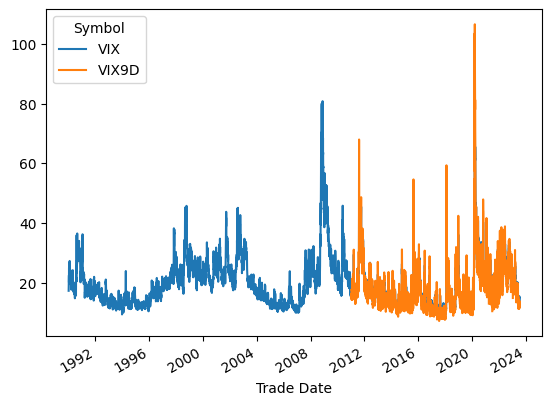

In [18]:
vix_cash_wide["Close"][["VIX","VIX9D"]].plot()

<Axes: xlabel='Trade Date'>

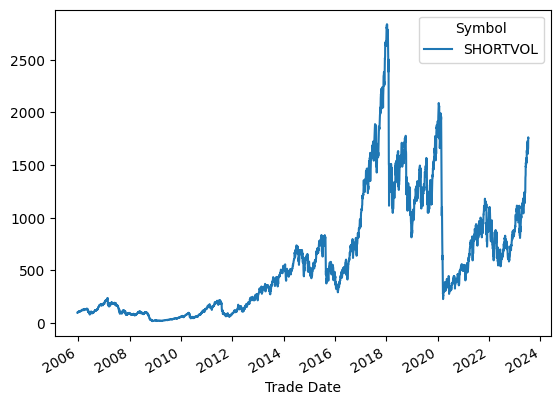

In [20]:
vix_cash_wide["Close"][["SHORTVOL"]].plot()

: 